In [1]:
# There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’,
# ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this
# dataset. How many of these are of inconsistent quality, as experienced by viewers?

# 1. Load the data 

# 2. Cleaning the data
# 2a. Remove all NaN values, row-wise
# 2b. Reorder the columns oldest to newest 
# 2c. Descriptive Statistics

# 3. Mann-Whitney U test

# 4. Plotting

In [31]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [33]:
# 1. Load the data 
df = pd.read_csv('movieReplicationSet.csv', sep=',')

data = df.loc[:,['Harry Potter' in i for i in df.columns]]
data

,Harry Potter and the Sorcerer's Stone (2001),Harry Potter and the Deathly Hallows: Part 2 (2011),Harry Potter and the Goblet of Fire (2005),Harry Potter and the Chamber of Secrets (2002)
0,NaN,NaN,0.0,0.5
1,4.0,NaN,NaN,4.0
2,4.0,3.5,4.0,3.5
3,2.0,2.0,2.5,2.5
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1092,4.0,4.0,4.0,4.0
1093,4.0,4.0,3.5,3.5
1094,3.5,4.0,3.0,4.0
1095,3.0,NaN,3.0,2.5


In [34]:
# 2. Cleaning the data

# 2a. Remove all NaN values, row-wise
data_ = data.dropna()
data_

# 2b. Reorder the columns oldest to newest 
data_sorted = data_[["Harry Potter and the Sorcerer's Stone (2001)", "Harry Potter and the Chamber of Secrets (2002)",
                    "Harry Potter and the Goblet of Fire (2005)", "Harry Potter and the Deathly Hallows: Part 2 (2011)"]]

In [35]:
# 2c. Descriptive Statistics
data_median = np.median(data_sorted, axis=0)
data_mean = np.mean(data_sorted, axis=0)
data_median

array([3.5, 3.5, 3.5, 3.5])

In [19]:
# 3. Mann-Whitney U test
u1,p1 = stats.mannwhitneyu(data_sorted.iloc[:,0], data_sorted.iloc[:,1])
u1,p1

(267607.5, 0.03249627616901361)

In [24]:
u2,p2 = stats.mannwhitneyu(data_sorted.iloc[:,0], data_sorted.iloc[:,2])
u2,p2

(267035.0, 0.03956708944851482)

In [25]:
u3,p3 = stats.mannwhitneyu(data_sorted.iloc[:,0], data_sorted.iloc[:,3])
u3,p3

(261733.5, 0.18199476405933168)

In [26]:
u4,p4 = stats.mannwhitneyu(data_sorted.iloc[:,1], data_sorted.iloc[:,2])
u4, p4

(251188.0, 0.9065980598085001)

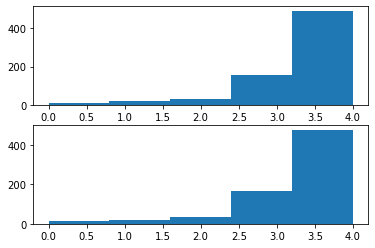

In [22]:
plt.subplot(2,1,1)
plt.hist(data_sorted.iloc[:,0], bins=5)
plt.subplot(2,1,2)
plt.hist(data_sorted.iloc[:,3], bins=5)
plt.show()